In [1]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Specify the model to be used (using the 'MODE')
COCO and MPI are body pose estimation model. COCO has 18 points and MPI has 15 points as output.


In [2]:
MODE = "MPI"          # we will choose the model here

if MODE == "COCO":
    protoFile = r"pose/coco/pose_deploy_linevec.prototxt"
    weightsFile = r"pose/coco/pose_iter_440000.caffemodel"
    nPoints = 18
    POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]

elif MODE == "MPI" :
    protoFile = r"pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
    weightsFile = r"pose/mpi/pose_iter_160000.caffemodel"
    nPoints = 15
    POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]

In [11]:
image1 = cv2.imread("messi.jpg")       # the image we want to study
frameWidth = image1.shape[1]
frameHeight = image1.shape[0]
threshold = 0.1

#### Load the network and pass the image through the network

In [12]:
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

inWidth = 368
inHeight = 368
inpBlob = cv2.dnn.blobFromImage(image1, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)
output = net.forward()
H = output.shape[2]
W = output.shape[3]
print(output.shape)

(1, 44, 46, 46)


## This is a probability map output for a spwcific keypoint of the body that we specify, according to the model. In this case, we have specified the left shoulder, by taking the value of inpur variable 'i' to be 5, as 5 corresponds to the left shoulder in the MPI model.

(-0.5, 599.5, 534.5, -0.5)

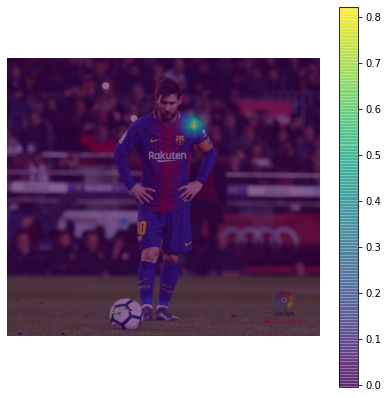

In [13]:
i = 5
probMap = output[0, i, :, :]
probMap = cv2.resize(probMap, (image1.shape[1], image1.shape[0]))
plt.figure(figsize=[7,7])
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.imshow(probMap, alpha=0.6)
plt.colorbar()
plt.axis("off")

### Similarly, here we will plot the affinity map on the image which will correspond to the region from the left shoulder to the neck

(-0.5, 599.5, 534.5, -0.5)

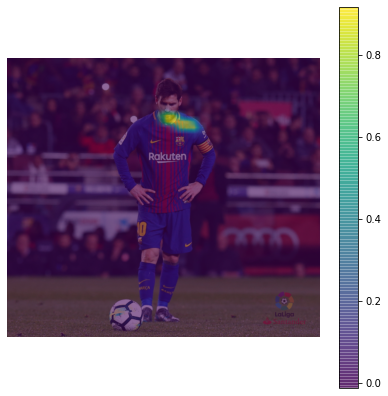

In [14]:
i = 24
probMap = output[0, i, :, :]
probMap = cv2.resize(probMap, (image1.shape[1], image1.shape[0]))
plt.figure(figsize=[7,7])
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.imshow(probMap, alpha=0.6)
plt.colorbar()
plt.axis("off")

### Now we will start working on finding the keypoints of the body, as per the model on the image. Here we can vary the threshold value according to us, depending on the factors in the image( 0.1 is good enough for not to be changed though).

In [15]:
frame = image1
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1                         

In [16]:
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()
H = output.shape[2]
W = output.shape[3]

# After collecting the points, now we will start mapping/plotting them onto the image.

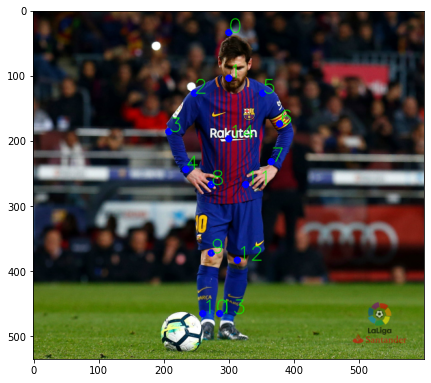

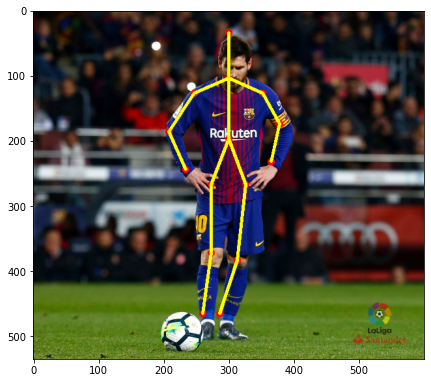

In [17]:
# Empty list to store the detected keypoints
points = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold : 
        cv2.circle(frameCopy, (int(x), int(y)), 3, (255, 0, 0), thickness=3, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1, lineType=cv2.LINE_AA)
        cv2.circle(frame, (int(x), int(y)), 3, (0, 0, 255), thickness=3, lineType=cv2.FILLED)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 3)

        
fc = frameCopy
f = frame
plt.figure(figsize=[7,7])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[7,7])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))





plt.show()

## Next, we will be using the COCO model, and looking at its output. (we will see too many points crowded on the face, as the COCO model plots some points on the face as well)

(1, 57, 46, 46)


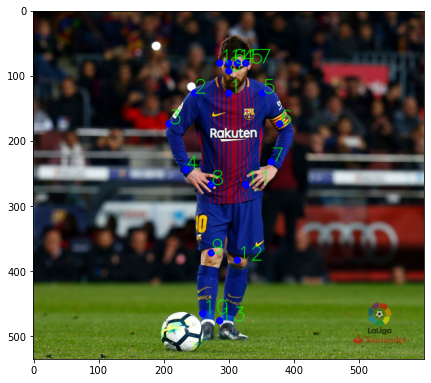

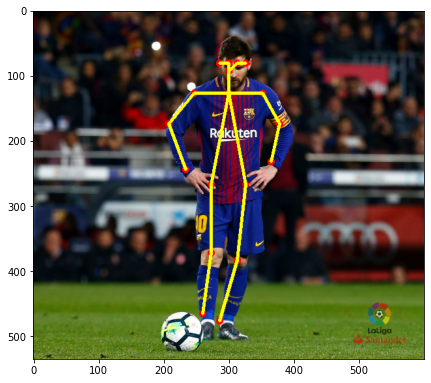

In [18]:
MODE = "COCO"

if MODE == "COCO":
    protoFile = "pose/coco/pose_deploy_linevec.prototxt"
    weightsFile = "pose/coco/pose_iter_440000.caffemodel"
    nPoints = 18
    POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]

elif MODE == "MPI" :
    protoFile = "pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
    weightsFile = "pose/mpi/pose_iter_160000.caffemodel"
    nPoints = 15
    POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]
    
image1 = cv2.imread("messi.jpg")
frameWidth = image1.shape[1]
frameHeight = image1.shape[0]
threshold = 0.1

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

inWidth = 368
inHeight = 368
inpBlob = cv2.dnn.blobFromImage(image1, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)
output = net.forward()
H = output.shape[2]
W = output.shape[3]
print(output.shape)

"""i = 5
probMap = output[0, i, :, :]
probMap = cv2.resize(probMap, (image1.shape[1], image1.shape[0]))
plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.imshow(probMap, alpha=0.6)
plt.colorbar()
plt.axis("off")

i = 24
probMap = output[0, i, :, :]
probMap = cv2.resize(probMap, (image1.shape[1], image1.shape[0]))
plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.imshow(probMap, alpha=0.6)
plt.colorbar()
plt.axis("off")"""

frame = image1
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1

inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()
H = output.shape[2]
W = output.shape[3]

# Empty list to store the detected keypoints
points = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold : 
        cv2.circle(frameCopy, (int(x), int(y)), 3, (255, 0, 0), thickness=3, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1, lineType=cv2.LINE_AA)
        cv2.circle(frame, (int(x), int(y)), 3, (0, 0, 255), thickness=3, lineType=cv2.FILLED)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 3)

fc1 = frameCopy
f1 = frame
plt.figure(figsize=[7,7])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[7,7])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## Below are the two different sets of points on the image, of the two different models( COCO followed by MPI)

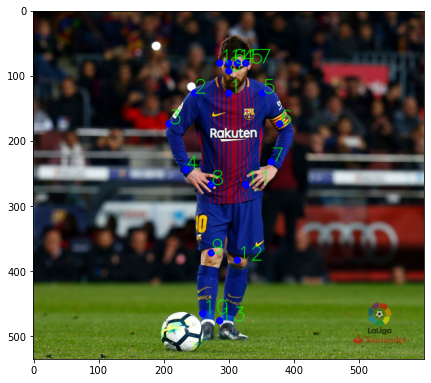

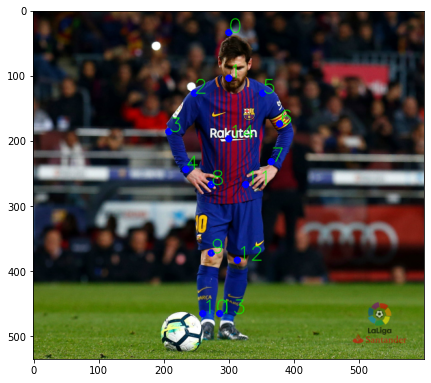

In [19]:
plt.figure(figsize=[7,7])
plt.imshow(cv2.cvtColor(fc1, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[7,7])
plt.imshow(cv2.cvtColor(fc, cv2.COLOR_BGR2RGB))

## Below we can see the difference in the skeletal structure of both the models as well. MPI represents lesser number of points as compared to COCO(15 vs 18). The major difference being in the fact that COCO also maps some points of the face, whereas MPI does not.

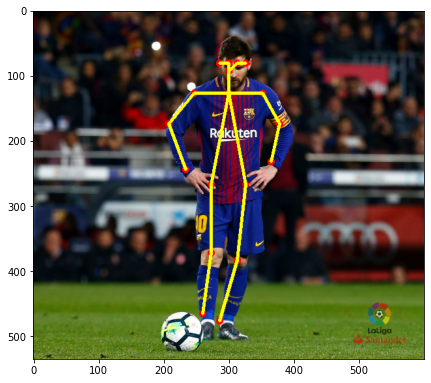

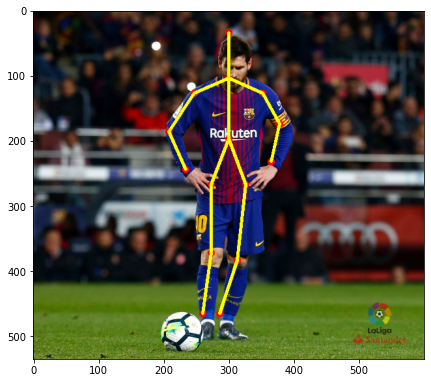

In [20]:
plt.figure(figsize=[7,7])
plt.imshow(cv2.cvtColor(f1, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[7,7])
plt.imshow(cv2.cvtColor(f, cv2.COLOR_BGR2RGB))

## We can also apply this algo on a video, as shown below.


In [21]:
MODE = "MPI"          # we will choose the model here

if MODE == "COCO":
    protoFile = r"pose/coco/pose_deploy_linevec.prototxt"
    weightsFile = r"pose/coco/pose_iter_440000.caffemodel"
    nPoints = 18
    POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]

elif MODE == "MPI" :
    protoFile = r"pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
    weightsFile = r"pose/mpi/pose_iter_160000.caffemodel"
    nPoints = 15
    POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]


inWidth = 368
inHeight = 368
threshold = 0.1



cap = cv2.VideoCapture('samp_video.mp4')
hasFrame, frame = cap.read()

vid_writer = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame.shape[1],frame.shape[0]))

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)


while cv2.waitKey(1) < 0:
    t = time.time()
    hasFrame, frame = cap.read()
    frameCopy = np.copy(frame)
    if not hasFrame:
        cv2.waitKey()
        break

    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]

    inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                              (0, 0, 0), swapRB=False, crop=False)
    net.setInput(inpBlob)
    output = net.forward()

    H = output.shape[2]
    W = output.shape[3]
    # Empty list to store the detected keypoints
    points = []

    for i in range(nPoints):
        # confidence map of corresponding body's part.
        probMap = output[0, i, :, :]

        # Find global maxima of the probMap.
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
        
        # Scale the point to fit on the original image
        x = (frameWidth * point[0]) / W
        y = (frameHeight * point[1]) / H

        if prob > threshold : 
            cv2.circle(frameCopy, (int(x), int(y)), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
            cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)

            # Add the point to the list if the probability is greater than the threshold
            points.append((int(x), int(y)))
        else :
            points.append(None)

    # Draw Skeleton
    for pair in POSE_PAIRS:
        partA = pair[0]
        partB = pair[1]

        if points[partA] and points[partB]:
            cv2.line(frame, points[partA], points[partB], (0, 255, 255), 3, lineType=cv2.LINE_AA)
            cv2.circle(frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
            cv2.circle(frame, points[partB], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

    #cv2.putText(frame, "time taken = {:.2f} sec".format(time.time() - t), (50, 50), cv2.FONT_HERSHEY_COMPLEX, .8, (255, 50, 0), 2, lineType=cv2.LINE_AA)
    # cv2.putText(frame, "OpenPose using OpenCV", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 50, 0), 2, lineType=cv2.LINE_AA)
    # cv2.imshow('Output-Keypoints', frameCopy)
    cv2.imshow('Output-Skeleton', frame)

    vid_writer.write(frame)

vid_writer.release()